In [1]:
import keras
from keras import layers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import optimizers

from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_digits
from sklearn import metrics

np.random.seed(10)


In [2]:
# Load data and target
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel for the entire vector for each input
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [4]:
#print the numbers for reference
x_train.shape
num_classes = len(np.unique(y_train))
print ("Number of images training samples:", x_train.shape[0])
print ("Number of images test samples:", x_test.shape[0])
print ("Number of classes:",num_classes)

Number of images training samples: 60000
Number of images test samples: 10000
Number of classes: 10


In [5]:
#replace for train labels with 1 for 5 and 0 for non-5 digits
def replace_class(y_train):
  for i in range(len(y_train)):
    if y_train[i] == 5:
      y_train[i] = 1
    else:
      y_train[i] = 0
  return y_train
print(replace_class(y_train))

[1 0 0 ... 1 0 0]


In [6]:
#replace for test labels with 1 for 5 and 0 for non-5 digits
def replace_class(y_test):
  for i in range(len(y_test)):
    if y_test[i] == 5:
      y_test[i] = 1
    else:
      y_test[i] = 0
  return y_test
print(replace_class(y_test))

[0 0 0 ... 0 1 0]


In [7]:
num_classes = len(np.unique(y_train))
print ("Number of classes:",num_classes)

Number of classes: 2


In [8]:
#train index list to drop 95% data of digit 5 only
train_index_list = np.where(y_train==1)[0]
pick = np.random.choice(range(len(train_index_list)),round(len(train_index_list)*0.95),replace = False)
temp1 = [train_index_list[i] for i in pick]

#test index list to drop 95% data of digit 5 only
test_index_list = np.where(y_test==1)[0]
pick = np.random.choice(range(len(test_index_list)),round(len(test_index_list)*0.95),replace = False)
temp2 = [test_index_list[i] for i in pick]

In [9]:
#drop 95% data from train and test datasets
x_train = np.delete(x_train, temp1,0)
y_train = np.delete(y_train, temp1)
x_test = np.delete(x_test, temp2,0)
y_test = np.delete(y_test, temp2)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54850, 28, 28)
(9153, 28, 28)
(54850,)
(9153,)


In [11]:
#concatenate feature and labels data for further reference
images = np.concatenate((x_train,x_test),axis=0)
labels = np.concatenate((y_train,y_test),axis=0)

In [12]:
#create one hot encoded data for labels
labels = np_utils.to_categorical(labels)

In [13]:
#Initiating CNN model
def model_cnn():
  model = Sequential()                               

  # Layer 1
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28,28,1),activation = 'relu'))
  model.add(Conv2D(32, (3, 3), padding='same',activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Layer 2
  model.add(Conv2D(64, (3, 3), padding='same',activation = 'relu'))
  model.add(Conv2D(64, (3, 3), padding='same',activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Layer 3
  model.add(Conv2D(160, (3, 3), padding='same',activation = 'relu'))
  model.add(Dropout(0.25))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(units = 160, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(units = 10, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))               
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [22]:
#running the CNN model on stratified data split into 80-20 ratio
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_index, test_index in sss.split(images,labels):
  print("TRAIN:", train_index, "TEST:", test_index)
  x_train, x_test = images[train_index], images[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  model=model_cnn()
  model.fit(x_train, y_train,epochs=10, batch_size=128, verbose=1)
  print(model.evaluate(x_test, y_test))

TRAIN: [ 1667 35925 11122 ... 10306 30721 47414] TEST: [63675 19981 18329 ... 55877  7919  2935]
Epoch 1/10
401/401 [==============================] - 4s 9ms/step - loss: 0.0656 - accuracy: 0.9933
Epoch 2/10
401/401 [==============================] - 3s 9ms/step - loss: 0.0161 - accuracy: 0.9981
Epoch 3/10
401/401 [==============================] - 3s 9ms/step - loss: 0.0099 - accuracy: 0.9986
Epoch 4/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0073 - accuracy: 0.9992
Epoch 5/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0072 - accuracy: 0.9993
Epoch 6/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0069 - accuracy: 0.9994
Epoch 7/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0062 - accuracy: 0.9993
Epoch 8/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 9/10
401/401 [==============================] - 3s 8ms/step - loss: 0.0046 - accuracy: 0.9996
Epo

In [23]:
#creating a confusion matrix to gauge the correct performance of the model
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax((y_test), axis=-1)
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[12737     1]
 [    7    56]]


In [24]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adam

In [26]:
#defining a discriminator model
def discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def generator(latent_dim):
	model = Sequential()
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (14,14), activation='sigmoid', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare mnist training images
def expand_samples(X,Y):
  trainX = [i for i,j in zip(X,Y) if j[1] == 1]
  X = expand_dims(trainX, axis=-1)
  return X

# select real samples
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=40, n_batch=8):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			d_loss, _ = d_model.train_on_batch(X, y)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
		print("D_loss:",d_loss,"G_loss:", g_loss)


latent_dim = 100
#calling all the functions
d_model = discriminator()
g_model = generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = expand_samples(images,labels)
train(g_model, d_model, gan_model, dataset, latent_dim)
# source: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/

D_loss: 0.5872055292129517 G_loss: 0.6972579956054688
D_loss: 0.3526886999607086 G_loss: 0.7327490448951721
D_loss: 0.28080469369888306 G_loss: 1.4994890689849854
D_loss: 0.26794666051864624 G_loss: 1.0818939208984375
D_loss: 0.09351865947246552 G_loss: 2.0494256019592285
D_loss: 0.04521624743938446 G_loss: 3.038402557373047
D_loss: 0.04027918726205826 G_loss: 3.572005033493042
D_loss: 0.017364010214805603 G_loss: 3.9122986793518066
D_loss: 0.006508877966552973 G_loss: 4.369635581970215
D_loss: 0.006372396368533373 G_loss: 4.305562973022461
D_loss: 0.007909576408565044 G_loss: 4.557278633117676
D_loss: 0.0031176097691059113 G_loss: 5.126757621765137
D_loss: 0.01999818906188011 G_loss: 5.22074556350708
D_loss: 0.8550803661346436 G_loss: 1.0323160886764526
D_loss: 0.4707583785057068 G_loss: 1.0004830360412598
D_loss: 0.7516202926635742 G_loss: 0.569625973701477
D_loss: 0.7572505474090576 G_loss: 0.8564823865890503
D_loss: 0.700911819934845 G_loss: 0.7194140553474426
D_loss: 0.67723369598

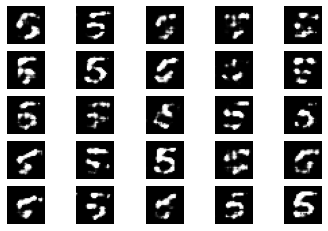

In [27]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, 0],cmap="gray")
	plt.show()
 
model = g_model
latent_points = generate_latent_points(100, 64003)
X_results = model.predict(latent_points)
save_plot(X_results, 5)

In [28]:
X_results = X_results.reshape(64003,28,28)
Y_results = ones((64003, 1))
Y_results = np_utils.to_categorical(Y_results)
print(x_test.shape, X_results.shape)

(12801, 28, 28) (64003, 28, 28)


In [29]:
#combining the dataset of newly generated images and labels data
images_new = np.concatenate((images, X_results), axis=0)
labels_new = np.concatenate((labels, Y_results), axis=0)

In [32]:
#running the CNN model again on new dataset with the augmented data
sss_new = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss_new.split(images_new,labels_new):
  x_train1, x_test1 = images_new[train_index], images_new[test_index]
  y_train1, y_test1 = labels_new[train_index], labels_new[test_index]
  model=model_cnn()
  model.fit(x_train1, y_train1,epochs=10, batch_size=200, verbose=1)
  print(model.evaluate(x_test1, y_test1))

Epoch 1/10
513/513 [==============================] - 7s 11ms/step - loss: 0.0620 - accuracy: 0.9870
Epoch 2/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0121 - accuracy: 0.9987
Epoch 3/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0065 - accuracy: 0.9987
Epoch 4/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 5/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 6/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 7/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 8/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 9/10
513/513 [==============================] - 6s 11ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 10/10
801/801 [==============================] - 3s 3ms/step - loss: 0.0016 - accurac

In [33]:
y_pred_new = np.argmax(model.predict(x_test1), axis=-1)
y_test1 = np.argmax((y_test1), axis=-1)
print(metrics.confusion_matrix(y_test1, y_pred_new))

[[12736     2]
 [    8 12856]]


**Comment on any differences that you saw in the two cases and generalize your comments on the utility of the approach above. **

Ans:
1. High accuracy of a machine learning model doesn't mean that the model is performing greatly. We measure the performance of the model quantitively, howevere, it is not the only factor to note.

2. Accuracy counts all of the true predicted values, but not specific for each label that exists. This is a serious concern if your goal wants to predict a specific label, for example, a positive label, correctly.

3. This is proven well in the above example where we got high accuracy for the CNN model when the data of digit 5 was less and slightly improved after augmenting the newly generated data.

4. This is extremely important in the cases where we are getting mispredictions in terms of lower data, however, those mispredictions add to a lot of misery and thus needs to be avoided.

5. These are the observatiobs from the above cases.